In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + key + "&q="

In [4]:
#SET UP LISTS FOR DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | lebu
Processing Record 2 | adrar
Processing Record 3 | mogadishu
Processing Record 4 | punta arenas
Processing Record 5 | jamestown
Processing Record 6 | vidim
Processing Record 7 | deer lake
Processing Record 8 | red bluff
Processing Record 9 | bubaque
Processing Record 10 | bluff
Processing Record 11 | butaritari
Processing Record 12 | ushuaia
Processing Record 13 | port alfred
Processing Record 14 | dunedin
Processing Record 15 | saint-philippe
Processing Record 16 | moron
Processing Record 17 | pahrump
Processing Record 18 | tiksi
City not found. Skipping...
City not found. Skipping...
Processing Record 19 | robertson
Processing Record 20 | hermanus
Processing Record 21 | new norfolk
City not found. Skipping...
Processing Record 22 | faanui
City not found. Skipping...
Processing Record 23 | guerrero negro
Processing Record 24 | dingle
Processing Record 25 | castro
Processing Record 26 | torbay
Processing R

Processing Record 224 | general pico
Processing Record 225 | leirvik
Processing Record 226 | nibong tebal
City not found. Skipping...
Processing Record 227 | kavieng
Processing Record 228 | qarqin
Processing Record 229 | petropavlovsk-kamchatskiy
Processing Record 230 | katherine
Processing Record 231 | sao paulo de olivenca
Processing Record 232 | bambous virieux
Processing Record 233 | anadyr
Processing Record 234 | neuquen
Processing Record 235 | port shepstone
Processing Record 236 | dargaville
Processing Record 237 | ahipara
Processing Record 238 | nautla
Processing Record 239 | vardo
Processing Record 240 | tessalit
Processing Record 241 | cayenne
Processing Record 242 | campbell river
Processing Record 243 | yenagoa
Processing Record 244 | longyearbyen
Processing Record 245 | franklin
Processing Record 246 | rajula
Processing Record 247 | haines junction
Processing Record 248 | nuuk
Processing Record 249 | hamilton
Processing Record 250 | mbaiki
Processing Record 251 | alice spr

Processing Record 450 | airai
Processing Record 451 | gushikawa
Processing Record 452 | ostrovnoy
Processing Record 453 | lyubim
Processing Record 454 | maryville
Processing Record 455 | vaasa
Processing Record 456 | merauke
Processing Record 457 | san ignacio
Processing Record 458 | nome
Processing Record 459 | czersk
Processing Record 460 | yerbogachen
City not found. Skipping...
Processing Record 461 | kargasok
Processing Record 462 | homer
Processing Record 463 | bay roberts
Processing Record 464 | marawi
Processing Record 465 | vostok
Processing Record 466 | la tuque
Processing Record 467 | saint-louis
Processing Record 468 | matagami
Processing Record 469 | pangody
Processing Record 470 | tevaitoa
Processing Record 471 | tanout
Processing Record 472 | coahuayana
Processing Record 473 | kiomboi
Processing Record 474 | swan hill
Processing Record 475 | nazca
Processing Record 476 | zhuhai
Processing Record 477 | bouca
Processing Record 478 | stephenville
Processing Record 479 | vic

In [6]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": long,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_data.csv")

city_data.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [7]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lebu,84,ET,1563990335,84,8.96,38.73,57.79,2.75
1,Adrar,0,DZ,1563990336,10,27.87,-0.29,107.60,19.46
2,Mogadishu,100,SO,1563990337,80,2.04,45.34,74.71,14.79
3,Punta Arenas,75,CL,1563990338,86,-53.16,-70.91,37.40,4.70
4,Jamestown,0,AU,1563990288,91,-33.21,138.60,45.91,5.75


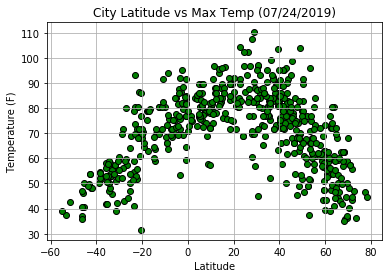

In [11]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", color = "green")
plt.title("City Latitude vs Max Temp (07/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("LatTemp.png")
plt.show()

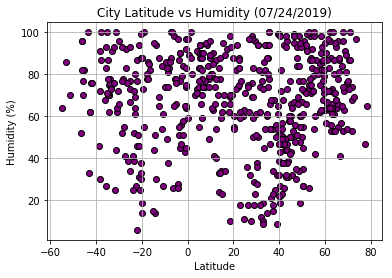

In [13]:
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", color="purple")
plt.title("City Latitude vs Humidity (07/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatHumidity.png")
plt.show()

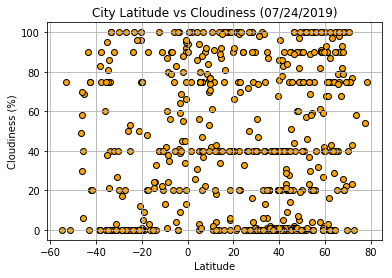

In [14]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", color="orange")
plt.title("City Latitude vs Cloudiness (07/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatClouds.png")
plt.show()

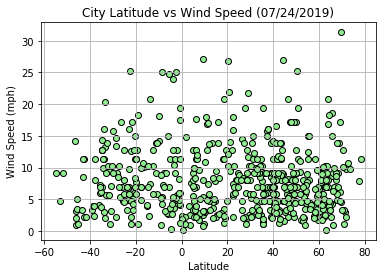

In [15]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black",  color="lightgreen")
plt.title("City Latitude vs Wind Speed (07/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatWind.png")
plt.show()